In [1]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

In [95]:
import mpld3
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

In [80]:
def plot_clustered_stacked(dfall, labels=None, title="Energy Usage [kWh]",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.yaxis.grid()
    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title,fontsize=15)
    axe.tick_params(labelsize=15)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5],fontsize=15)
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1],fontsize=15) 
    axe.add_artist(l1)
    return axe



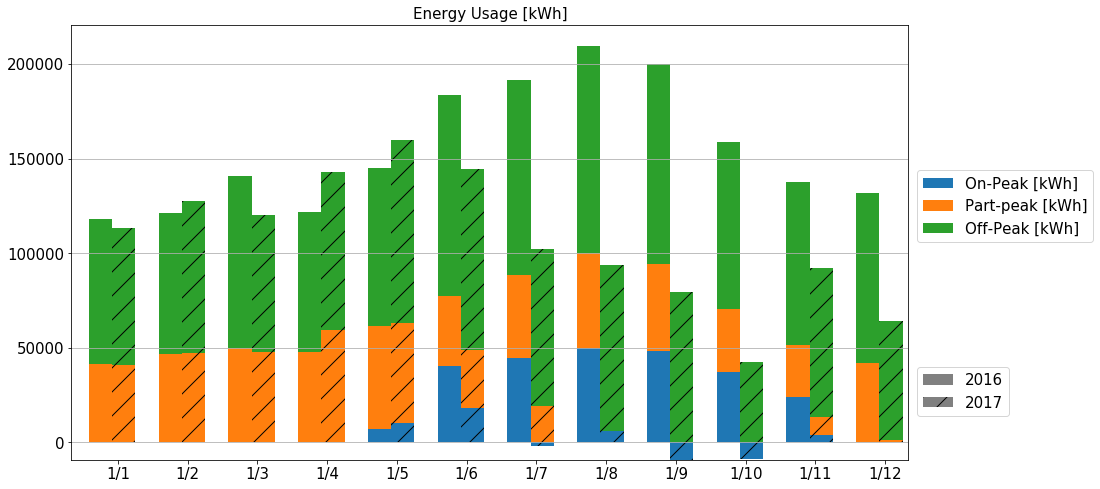

In [81]:
# create Energy df
data16 = {"On-Peak [kWh]":[    0,     0,     0,     0,  6954, 40330, 44774, 50116, 48475,37136, 24213,     0], "Part-peak [kWh]": [41194, 46517, 49771, 47844, 54553, 36894, 43771, 50253, 45961, 33390, 27505, 41818], "Off-Peak [kWh]": [ 76657,  74913,  91283,  74208,  83518, 106218, 103335, 109424,105496,  88313,  86018,  90159]}
index=["1/1", "1/2", "1/3", "1/4", "1/5","1/6", "1/7", "1/8", "1/9", "1/10", "1/11", "1/12"]
df1 = pd.DataFrame(data16, index)


data17 = {"On-Peak [kWh]":[0,     0,     0,     0, 10255, 17961, -1803,  6060, -9226, -8794,  3755,     0], "Part-peak [kWh]": [40671, 47283, 47816, 59193, 52625,  30819, 19253,     0,     0, 0,  9710,  1259], "Off-Peak [kWh]": [72839, 80235, 72352, 83822, 97159, 95882, 82740, 87770, 79603, 42440, 78687, 62871]}
index=["1/1", "1/2", "1/3", "1/4", "1/5","1/6", "1/7", "1/8", "1/9", "1/10", "1/11", "1/12"]
df2 = pd.DataFrame(data17, index)

# Then, just call :
plot_clustered_stacked([df1, df2],["2016", "2017"])

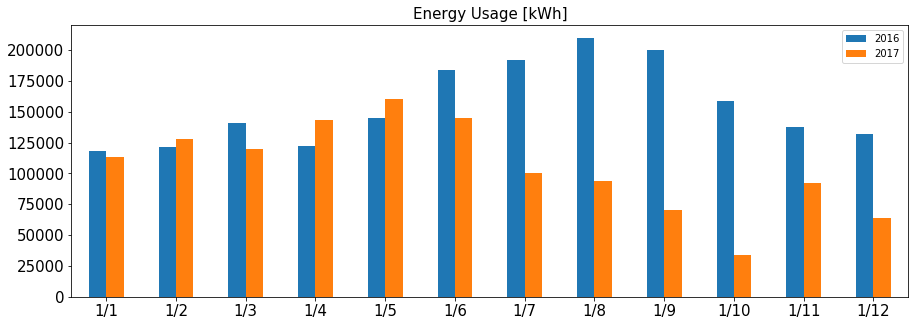

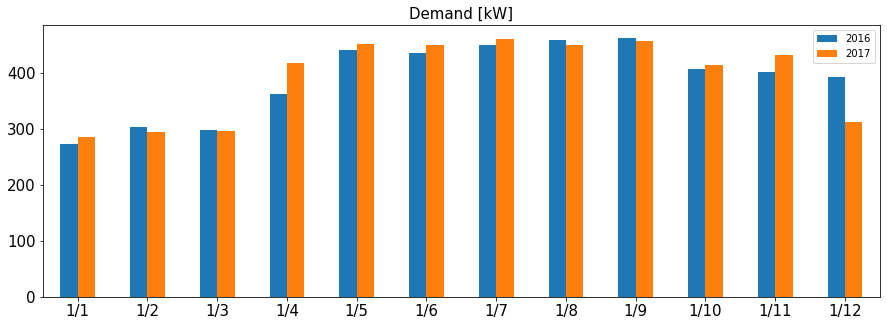

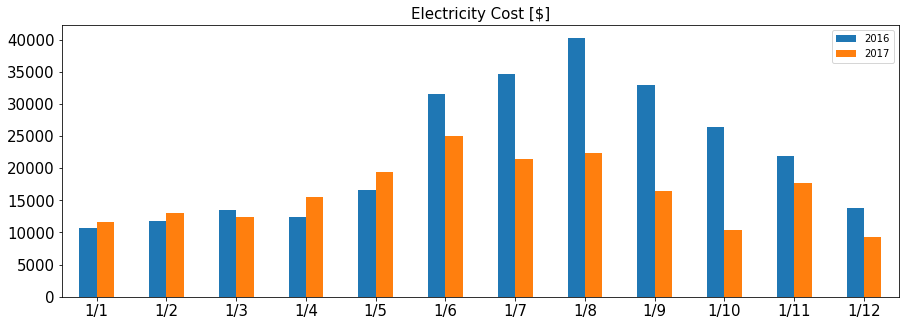

In [96]:
# Creating plots

index=["1/1", "1/2", "1/3", "1/4", "1/5","1/6", "1/7", "1/8", "1/9", "1/10", "1/11", "1/12"]

# create Energy df
onpk16 = np.array([    0,     0,     0,     0,  6954, 40330, 44774, 50116, 48475,37136, 24213,     0])
ppk16 = np.array([41194, 46517, 49771, 47844, 54553, 36894, 43771, 50253, 45961, 33390, 27505, 41818])
opk16 = np.array([ 76657,  74913,  91283,  74208,  83518, 106218, 103335, 109424,105496,  88313,  86018,  90159])
en16 = onpk16+ppk16+opk16

onpk17 = np.array([0,     0,     0,     0, 10255, 17961, -1803,  6060, -9226, -8794,  3755,     0])
ppk17 = np.array([40671, 47283, 47816, 59193, 52625,  30819, 19253,     0,     0, 0,  9710,  1259])
opk17 = np.array([72839, 80235, 72352, 83822, 97159, 95882, 82740, 87770, 79603, 42440, 78687, 62871])
en17 = onpk17+ppk17+opk17

df1 = pd.DataFrame({'2016':en16, '2017':en17}, index=index)
# ax = df3.plot.bar(rot=0)
# ax.set_xticklabels(df3.index, rotation = 0)
# title = 'Energy Usage [kWh]'
# ax.set_title(title,fontsize=15)
# ax.tick_params(labelsize=15)

# creating demand df
dem16 = np.array([273, 304, 298, 362, 441, 436, 450, 460, 463, 408, 402, 394])
dem17 = np.array([285, 294, 297, 419, 453, 450, 461, 451, 458, 414, 433, 312])

df2 = pd.DataFrame({'2016':dem16, '2017':dem17}, index=index)

# creating cost df
cost16 = np.array([10677.36, 11759.22, 13494.26, 12348.06, 16624.76, 31481.05, 34647.1 , 40247.26, 32932.31, 26468.05, 21910.49, 13839.13])
cost17 = np.array([11659.99, 13089.55, 12466.91, 15461.42, 19427.38,  25043.21, 21425.24, 22318.12, 16483.19, 10308.87, 17655.39,  9293.87])

df3 = pd.DataFrame({'2016':cost16, '2017':cost17},index=index)


# fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
# # make a little extra space between the subplots
# fig.subplots_adjust(hspace=0.5)

ax1 = df1.plot.bar(rot=0)
ax1.set_xticklabels(df1.index, rotation = 0)
title_en = 'Energy Usage [kWh]'
ax1.set_title(title_en,fontsize=15)
ax1.tick_params(labelsize=15)

ax2 = df2.plot.bar(rot=0)
ax2.set_xticklabels(df2.index, rotation = 0)
title_dem = 'Demand [kW]'
ax2.set_title(title_dem,fontsize=15)
ax2.tick_params(labelsize=15)

ax3 = df3.plot.bar(rot=0)
ax3.set_xticklabels(df3.index, rotation = 0)
title_cost = 'Electricity Cost [$]'
ax3.set_title(title_cost,fontsize=15)
ax3.tick_params(labelsize=15)

# plt.show()

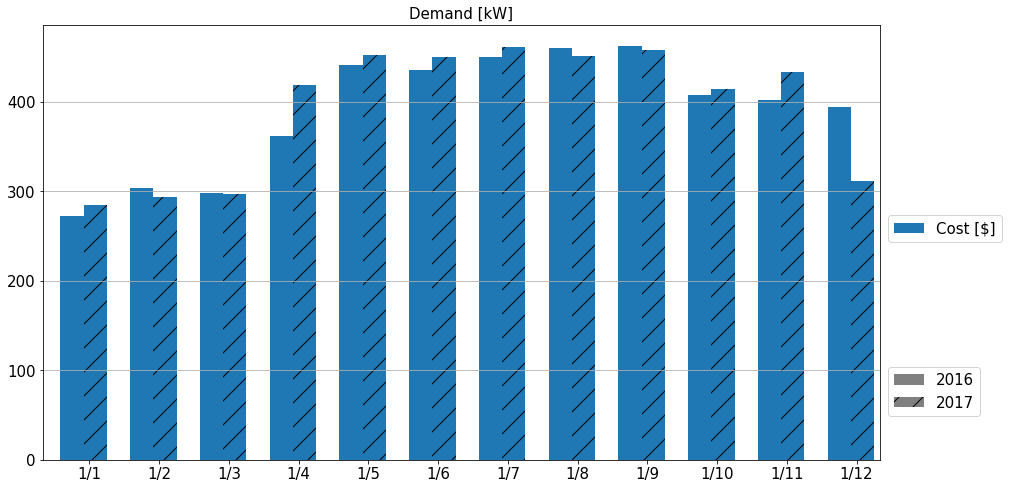

In [85]:
# Demand

dem16 = [273, 304, 298, 362, 441, 436, 450, 460, 463, 408, 402, 394]
dem17 = [285, 294, 297, 419, 453, 450, 461, 451, 458, 414, 433, 312]

# dem16 = [10677.36, 11759.22, 13494.26, 12348.06, 16624.76, 31481.05, 34647.1 , 40247.26, 32932.31, 26468.05, 21910.49, 13839.13]
# dem17 = [11659.99, 13089.55, 12466.91, 15461.42, 19427.38,  25043.21, 21425.24, 22318.12, 16483.19, 10308.87, 17655.39,  9293.87]

# create Energy df
data16 = {"Demand [kW]": dem16}
index=["1/1", "1/2", "1/3", "1/4", "1/5","1/6", "1/7", "1/8", "1/9", "1/10", "1/11", "1/12"]
demf1 = pd.DataFrame(data16, index)


data17 = {"Cost [$]": dem17}
index=["1/1", "1/2", "1/3", "1/4", "1/5","1/6", "1/7", "1/8", "1/9", "1/10", "1/11", "1/12"]
demf2 = pd.DataFrame(data17, index)

# Then, just call :
plot_clustered_stacked([demf1, demf2],["2016", "2017"], title='Demand [kW]')

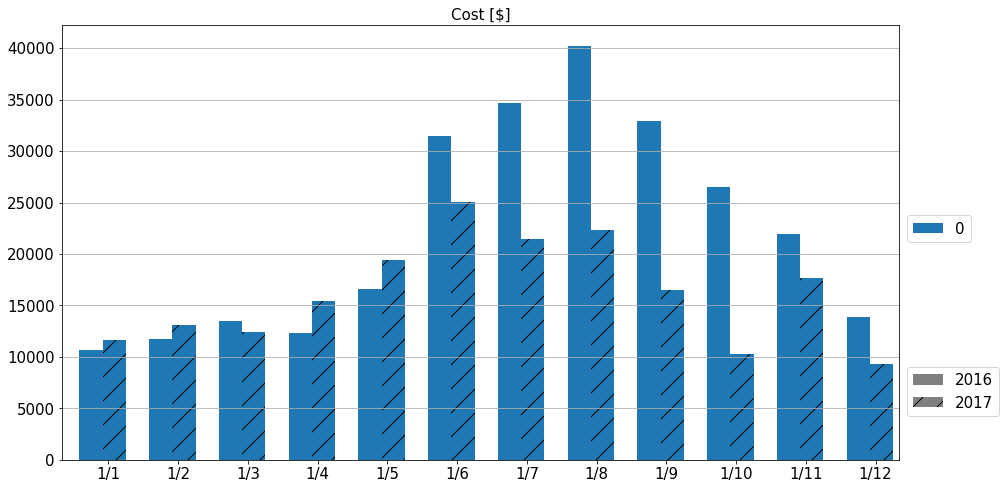

In [83]:
# Cost
cost16 = [10677.36, 11759.22, 13494.26, 12348.06, 16624.76, 31481.05, 34647.1 , 40247.26, 32932.31, 26468.05, 21910.49, 13839.13]
cost17 = [11659.99, 13089.55, 12466.91, 15461.42, 19427.38,  25043.21, 21425.24, 22318.12, 16483.19, 10308.87, 17655.39,  9293.87]

# create Energy df
data16 = {"Cost [$]": cost16}
index=["1/1", "1/2", "1/3", "1/4", "1/5","1/6", "1/7", "1/8", "1/9", "1/10", "1/11", "1/12"]
df_cost1 = pd.DataFrame(cost16, index)

data17 = {"Cost [$]": cost17}
index=["1/1", "1/2", "1/3", "1/4", "1/5","1/6", "1/7", "1/8", "1/9", "1/10", "1/11", "1/12"]
df_cost2 = pd.DataFrame(cost17, index)

# Then, just call :
plot_clustered_stacked([df_cost1, df_cost2],["2016", "2017"], title='Cost [$]')

In [55]:
arr = np.array([9293.87
,17655.39
,10308.87
,16483.19
,22318.12
,21425.24
,8504.65
,19427.38
,15461.42
,12466.91
,13089.55
,11659.99
,13839.13
,21910.49
,26468.05
,32932.31
,40247.26
,34647.10
,31481.05
,16624.76
,12348.06
,13494.26
,11759.22
,10677.36])
arr[::-1]

array([10677.36, 11759.22, 13494.26, 12348.06, 16624.76, 31481.05,
       34647.1 , 40247.26, 32932.31, 26468.05, 21910.49, 13839.13,
       11659.99, 13089.55, 12466.91, 15461.42, 19427.38,  8504.65,
       21425.24, 22318.12, 16483.19, 10308.87, 17655.39,  9293.87])

In [ ]:
T = np.arange([15,30,1])
RH = np.arange([30,80,10])
THI = 0.8*T + RH[0]*(T-14.4) + 46.4

In [97]:
!jupyter nbconvert --to script DDbill.ipynb

[NbConvertApp] Converting notebook DDbill.ipynb to script
[NbConvertApp] Writing 7363 bytes to DDbill.py
